# Exploring Dandiset 000673: Control of Working Memory by Phase-Amplitude Coupling of Human Hippocampal Neurons

## ⚠️ AI-Generated Notebook Warning

**This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please use caution when interpreting the code or results.**

## Overview

This notebook explores Dandiset 000673, which contains human intracranial recordings during a Sternberg working memory task. The dataset includes data from 36 patients with electrodes implanted in the medial temporal lobe and medial frontal cortex for clinical purposes. 

In this dataset, researchers investigated how theta-gamma phase-amplitude coupling in the hippocampus helps maintain information in working memory, providing a potential mechanism for cognitive control over memory processes.

You can view this dataset on Neurosift: [https://neurosift.app/dandiset/000673](https://neurosift.app/dandiset/000673)

## Required Packages

These are the packages needed to run this notebook. The code assumes they are already installed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pynwb
import h5py
import remfile
from scipy import signal
import seaborn as sns

# Set the style for better visualization
sns.set_theme()

## Loading the Dandiset

First, we'll connect to the DANDI archive and explore the dataset structure.

In [2]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000673")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 44 assets in the dataset

First 5 assets:
- sub-11/sub-11_ses-1_ecephys+image.nwb
- sub-12/sub-12_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-1_ecephys+image.nwb
- sub-1/sub-1_ses-2_ecephys+image.nwb
- sub-10/sub-10_ses-1_ecephys+image.nwb


## Loading an NWB File

Let's load one of the NWB files to examine its contents. We'll use the subject-10 session 1 file.

In [3]:
# The NWB file URL for sub-10 from the Dandiset
asset_id = "c03df798-01fc-4023-ab51-e1721e2db93c"
file_path = "sub-10/sub-10_ses-1_ecephys+image.nwb"

# Construct the URL for accessing the asset
url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading NWB file from: {url}")

# Create a remote file object
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)

# Open the NWB file
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Loading NWB file from: https://api.dandiarchive.org/api/assets/c03df798-01fc-4023-ab51-e1721e2db93c/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


## Exploring NWB File Metadata

Let's examine the general metadata and content of the NWB file.

In [4]:
# Print basic information about the recording
print(f"Session description: {nwb.session_description}")
print(f"Session identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")
print(f"Institution: {nwb.institution}")
print(f"Lab: {nwb.lab}")

# Print subject information
print("\nSubject information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Sex: {nwb.subject.sex}")
print(f"Species: {nwb.subject.species}")

Session description: SBCAT_ID: 10
Session identifier: sub-10_ses-1_P68CS
Session start time: 2020-01-01 00:00:00-08:00
Experimenter: ('Kyzar, Michael',)
Institution: Cedars-Sinai Medical Center
Lab: Rutishauser

Subject information:
Subject ID: 10
Age: P54Y
Sex: M
Species: Homo sapiens


## Behavioral Task Data

The subjects performed a Sternberg working memory task. Let's examine the trial structure and behavioral performance.

In [5]:
# Get trials as a pandas dataframe
trials_df = nwb.trials.to_dataframe()

print(f"Total number of trials: {len(trials_df)}")
print(f"\nTrial columns: {list(trials_df.columns)}")
print(f"\nUnique memory loads: {sorted(trials_df['loads'].unique())}")

# Show a sample of the first few trials
trials_df[['loads', 'PicIDs_Encoding1', 'PicIDs_Encoding2', 'PicIDs_Encoding3', 
           'PicIDs_Probe', 'response_accuracy', 'probe_in_out']].head()

Total number of trials: 140

Trial columns: ['loads', 'PicIDs_Encoding1', 'PicIDs_Encoding2', 'PicIDs_Encoding3', 'PicIDs_Probe', 'start_time', 'stop_time', 'timestamps_FixationCross', 'timestamps_Encoding1', 'timestamps_Encoding1_end', 'timestamps_Encoding2', 'timestamps_Encoding2_end', 'timestamps_Encoding3', 'timestamps_Encoding3_end', 'timestamps_Maintenance', 'timestamps_Probe', 'timestamps_Response', 'response_accuracy', 'probe_in_out']

Unique memory loads: [1, 3]


,loads,PicIDs_Encoding1,PicIDs_Encoding2,PicIDs_Encoding3,PicIDs_Probe,response_accuracy,probe_in_out
id,,,,,,,
0,3,201,101,501,501,1,1
1,3,202,102,502,502,1,1
2,3,301,401,103,301,0,1
3,1,503,0,0,503,1,1
4,3,402,203,504,103,1,0


The trial structure shows that participants performed a Sternberg task with memory loads of 1 and 3 items. For load 1 trials, only a single image was presented, while for load 3 trials, three consecutive images were shown. The `probe_in_out` column indicates whether the probe image was present in the memory set (1) or not (0).

Performance by memory load:
Load 1: 97.14% correct
Load 3: 87.14% correct


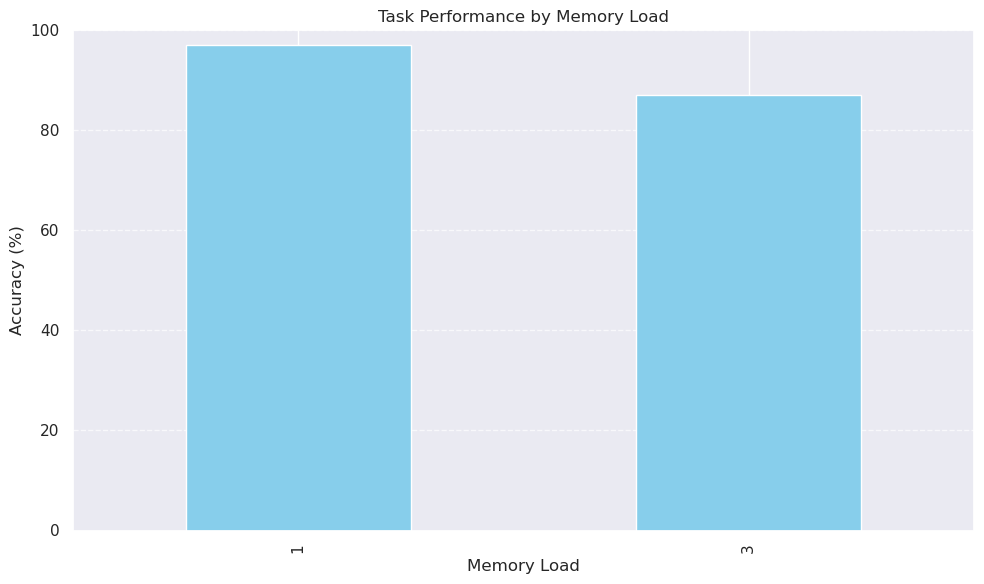

In [6]:
# Compute performance by memory load
performance_by_load = trials_df.groupby('loads')['response_accuracy'].mean() * 100

print("Performance by memory load:")
for load, accuracy in performance_by_load.items():
    print(f"Load {load}: {accuracy:.2f}% correct")

# Plot performance by memory load
plt.figure(figsize=(10, 6))
performance_by_load.plot(kind='bar', color='skyblue')
plt.title('Task Performance by Memory Load')
plt.xlabel('Memory Load')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

As expected, performance decreases as memory load increases, demonstrating the limited capacity of working memory.


Mean reaction time by memory load:
Load 1: 1442.96 ms
Load 3: 1791.51 ms


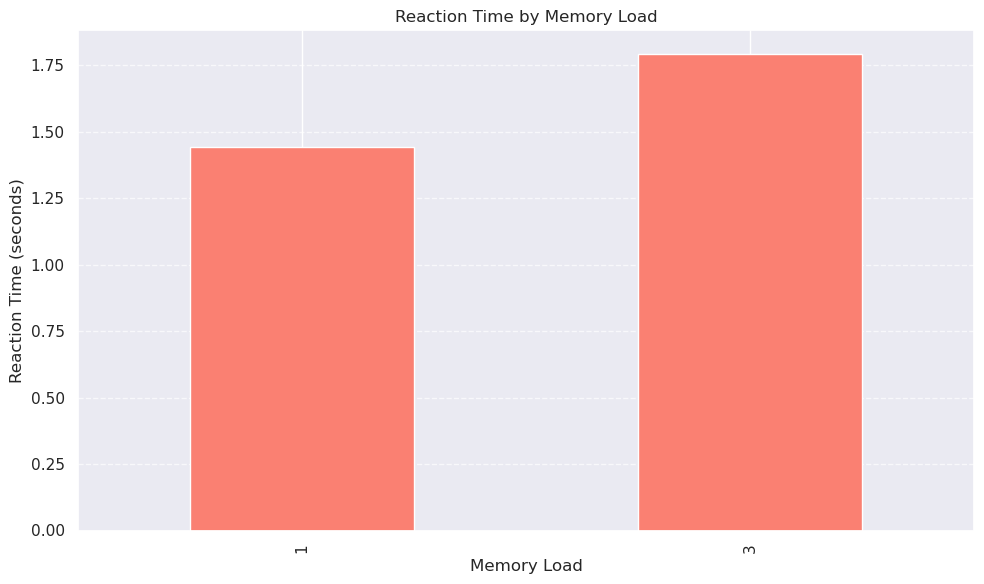

In [7]:
# Analyze reaction time by memory load
trials_df['reaction_time'] = trials_df['timestamps_Response'] - trials_df['timestamps_Probe']
reaction_time_by_load = trials_df.groupby('loads')['reaction_time'].mean()

print("\nMean reaction time by memory load:")
for load, rt in reaction_time_by_load.items():
    print(f"Load {load}: {rt*1000:.2f} ms")

# Plot reaction time by memory load
plt.figure(figsize=(10, 6))
reaction_time_by_load.plot(kind='bar', color='salmon')
plt.title('Reaction Time by Memory Load')
plt.xlabel('Memory Load')
plt.ylabel('Reaction Time (seconds)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Reaction times are also affected by memory load, with higher loads resulting in longer reaction times. This pattern is consistent with the increased cognitive demand of maintaining more items in working memory.


Performance by probe type:
Not in memory (70 trials): 100.00% correct
In memory (70 trials): 84.29% correct


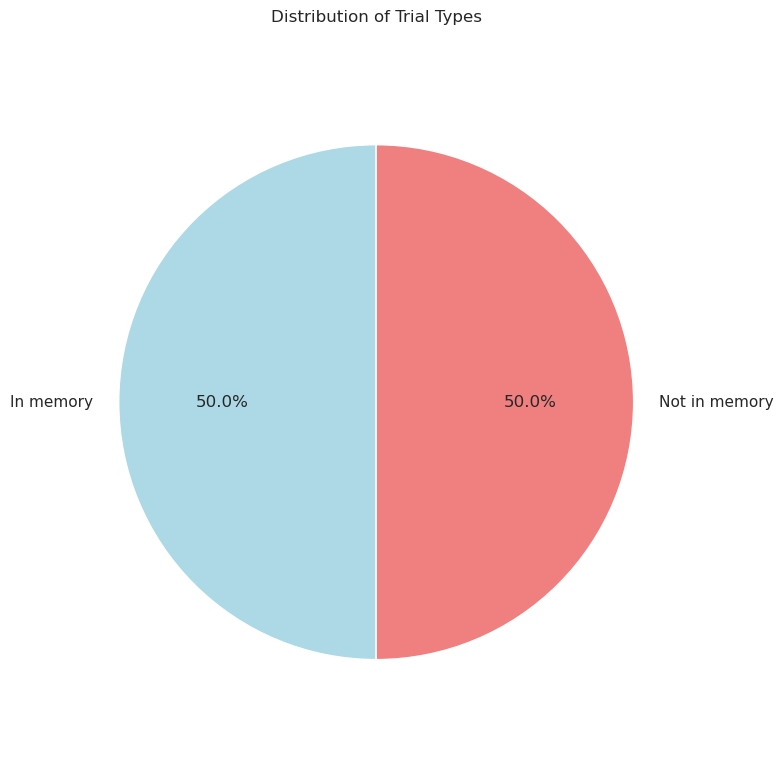

In [8]:
# Analysis of probe_in_out (in-memory vs not-in-memory probe)
in_vs_out_accuracy = trials_df.groupby('probe_in_out')['response_accuracy'].mean() * 100
in_vs_out_size = trials_df.groupby('probe_in_out').size()

print("\nPerformance by probe type:")
for probe_type, accuracy in in_vs_out_accuracy.items():
    type_name = "In memory" if probe_type == 1 else "Not in memory"
    count = in_vs_out_size[probe_type]
    print(f"{type_name} ({count} trials): {accuracy:.2f}% correct")

# Plot pie chart of trial distribution
plt.figure(figsize=(8, 8))
labels = ['In memory', 'Not in memory']
sizes = [in_vs_out_size[1], in_vs_out_size[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.axis('equal')
plt.title('Distribution of Trial Types')
plt.tight_layout()

Interestingly, performance is better for "not in memory" probes than for "in memory" probes. This suggests that it's easier to reject new items than to correctly recognize previously seen items, which may reflect different cognitive processes involved in recognition versus rejection.

## Exploring Electrode Locations

In [9]:
# Get electrode information
electrodes_df = nwb.electrodes.to_dataframe()
print(f"Total number of electrodes: {len(electrodes_df)}")
print(f"\nElectrode columns: {list(electrodes_df.columns)}")
print("\nBrain regions:")
print(electrodes_df['location'].value_counts())

Total number of electrodes: 54

Electrode columns: ['x', 'y', 'z', 'location', 'filtering', 'group', 'group_name', 'origChannel']

Brain regions:
location
pre_supplementary_motor_area_left         7
ventral_medial_prefrontal_cortex_right    7
dorsal_anterior_cingulate_cortex_right    7
pre_supplementary_motor_area_right        7
ventral_medial_prefrontal_cortex_left     7
dorsal_anterior_cingulate_cortex_left     6
hippocampus_left                          6
amygdala_right                            5
hippocampus_right                         2
Name: count, dtype: int64


The electrodes are distributed across various brain regions, including the prefrontal cortex, anterior cingulate cortex, hippocampus, and amygdala. These regions are known to be involved in working memory and cognitive control processes.

## Local Field Potentials (LFPs)

Now, let's examine the LFP data. LFPs represent the summed electrical activity of a population of neurons and can provide insights into oscillatory activity in different brain regions.

In [10]:
# Get information about the LFP data
lfp = nwb.acquisition["LFPs"]
sampling_rate = lfp.rate
print(f"LFP sampling rate: {sampling_rate} Hz")
print(f"LFP data shape: {lfp.data.shape}")
print(f"LFP starting time: {lfp.starting_time} seconds")

# Get a sample of LFP data - first 20 seconds from 5 channels
time_window = 20  # seconds
time_samples = int(time_window * sampling_rate)
channel_count = 5

# Get the subset of LFP data
lfp_data = lfp.data[:time_samples, :channel_count]
lfp_time = np.arange(lfp_data.shape[0]) / sampling_rate + lfp.starting_time

LFP sampling rate: 400.0 Hz
LFP data shape: (569380, 44)
LFP starting time: 0.0024844999999999997 seconds


Let's visualize the LFP traces to examine the oscillatory patterns:

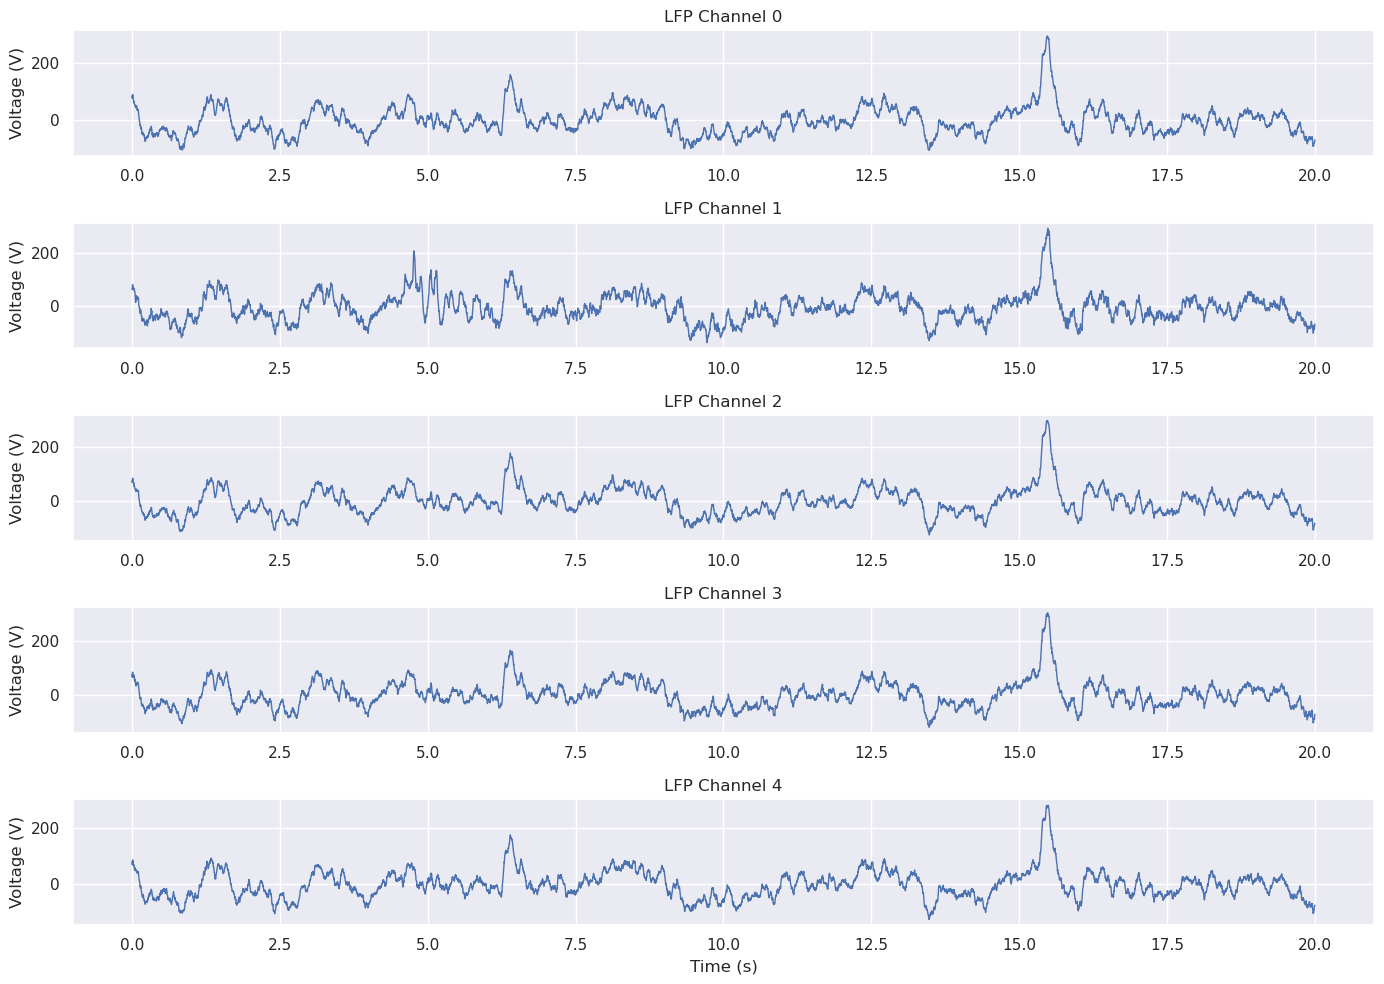

In [11]:
# Plot LFP traces for the first 5 channels
plt.figure(figsize=(14, 10))
for i in range(channel_count):
    plt.subplot(channel_count, 1, i+1)
    plt.plot(lfp_time, lfp_data[:, i], linewidth=1)
    plt.title(f'LFP Channel {i}')
    if i == channel_count - 1:
        plt.xlabel('Time (s)')
    plt.ylabel('Voltage (V)')
plt.tight_layout()

The LFP traces show synchronized activity across channels, with prominent peaks around 6-7 seconds and 15 seconds. These large deflections likely represent significant neural events that occurred during task performance.

Let's analyze the frequency content of the LFP data using a power spectral density (PSD) analysis:

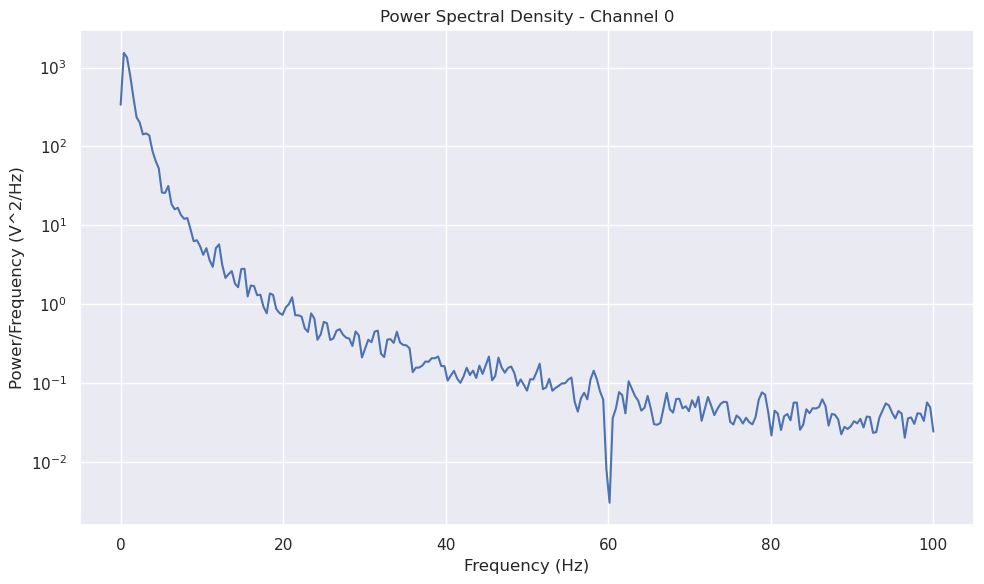

In [12]:
# Compute power spectral density for the first channel
channel_idx = 0
f, Pxx = signal.welch(lfp_data[:, channel_idx], fs=sampling_rate, nperseg=1024)
# Limit to frequencies below 100 Hz where most relevant LFP activity occurs
freq_mask = f <= 100
f = f[freq_mask]
Pxx = Pxx[freq_mask]

# Plot PSD
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx)
plt.title(f'Power Spectral Density - Channel {channel_idx}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (V^2/Hz)')
plt.grid(True)
plt.tight_layout()

The PSD shows a classic 1/f slope with higher power at lower frequencies, which is typical of neural recordings. The highest power is in the delta (1-4 Hz) and theta (4-8 Hz) ranges, which are associated with cognitive functions including working memory.

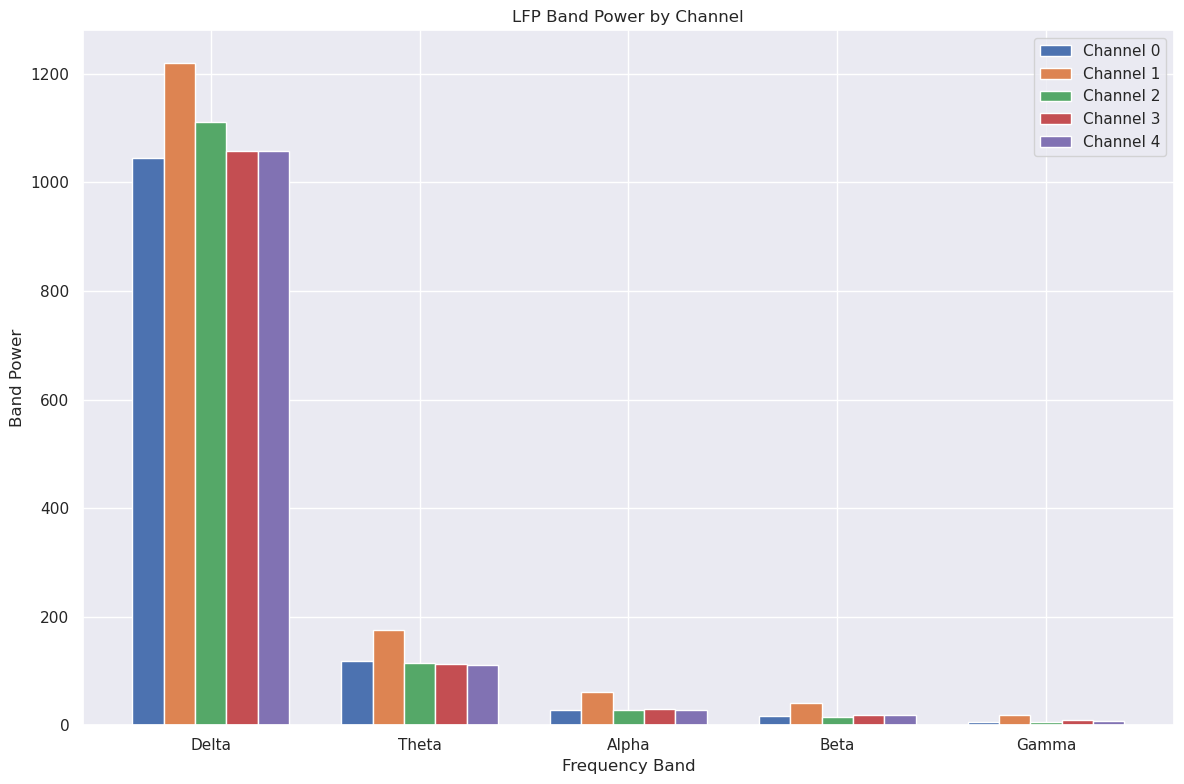

In [13]:
# Calculate band power in different frequency bands
bands = {
    'Delta': (1, 4),
    'Theta': (4, 8),
    'Alpha': (8, 13),
    'Beta': (13, 30),
    'Gamma': (30, 100)
}

# Create a function to calculate band power
def bandpower(data, sf, band):
    f, Pxx = signal.welch(data, fs=sf, nperseg=1024)
    ind_min = np.argmax(f > band[0]) - 1
    ind_max = np.argmax(f > band[1]) - 1
    return np.trapz(Pxx[ind_min: ind_max], f[ind_min: ind_max])

# Calculate band power for each channel
band_power = np.zeros((channel_count, len(bands)))
for i, (name, band) in enumerate(bands.items()):
    for ch in range(channel_count):
        band_power[ch, i] = bandpower(lfp_data[:, ch], sampling_rate, band)

# Plot band power for each channel
plt.figure(figsize=(12, 8))
bar_width = 0.15
index = np.arange(len(bands))
for ch in range(channel_count):
    plt.bar(index + ch * bar_width, band_power[ch], bar_width, 
            label=f'Channel {ch}')
    
plt.xlabel('Frequency Band')
plt.ylabel('Band Power')
plt.title('LFP Band Power by Channel')
plt.xticks(index + bar_width * (channel_count - 1) / 2, bands.keys())
plt.legend()
plt.tight_layout()

The band power analysis confirms that the delta band has the highest power across all channels, followed by the theta band. This is consistent with the role of low-frequency oscillations in cognitive processes, including working memory.

## Neural Units (Single Neurons)

This dataset includes single-unit recordings from neurons in the medial temporal lobe and frontal cortex. Let's examine the properties of these neurons.

In [14]:
# Get units information
units_df = nwb.units.to_dataframe()
print(f"Total number of units: {len(units_df)}")
print(f"\nUnit columns: {list(units_df.columns)}")

Total number of units: 36

Unit columns: ['spike_times', 'electrodes', 'clusterID_orig', 'waveforms', 'waveforms_mean_snr', 'waveforms_peak_snr', 'waveforms_isolation_distance', 'waveforms_mean_proj_dist']


The dataset contains 36 units (neurons) with spike times, electrode information, and quality metrics.

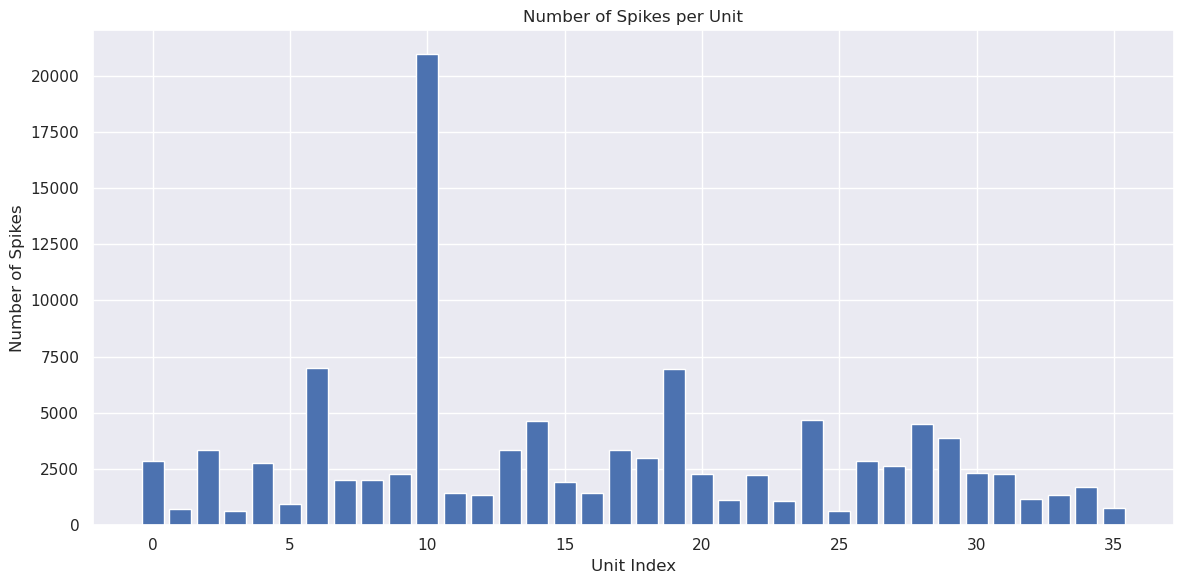

In [15]:
# Plot spike counts for all units
spike_counts = []
unit_ids = []
for i, unit_id in enumerate(nwb.units.id.data):
    spike_times = nwb.units['spike_times'][i]
    spike_counts.append(len(spike_times))
    unit_ids.append(unit_id)

plt.figure(figsize=(12, 6))
plt.bar(range(len(spike_counts)), spike_counts)
plt.title('Number of Spikes per Unit')
plt.xlabel('Unit Index')
plt.ylabel('Number of Spikes')
plt.tight_layout()

There's considerable variation in the number of spikes per unit, with some neurons being much more active than others. This heterogeneity is typical in neural recordings and reflects differences in neuron types, locations, and involvement in task-related processes.

Let's examine how a specific neuron responds during the task:

Analyzing Unit 0
Number of spikes: 2867


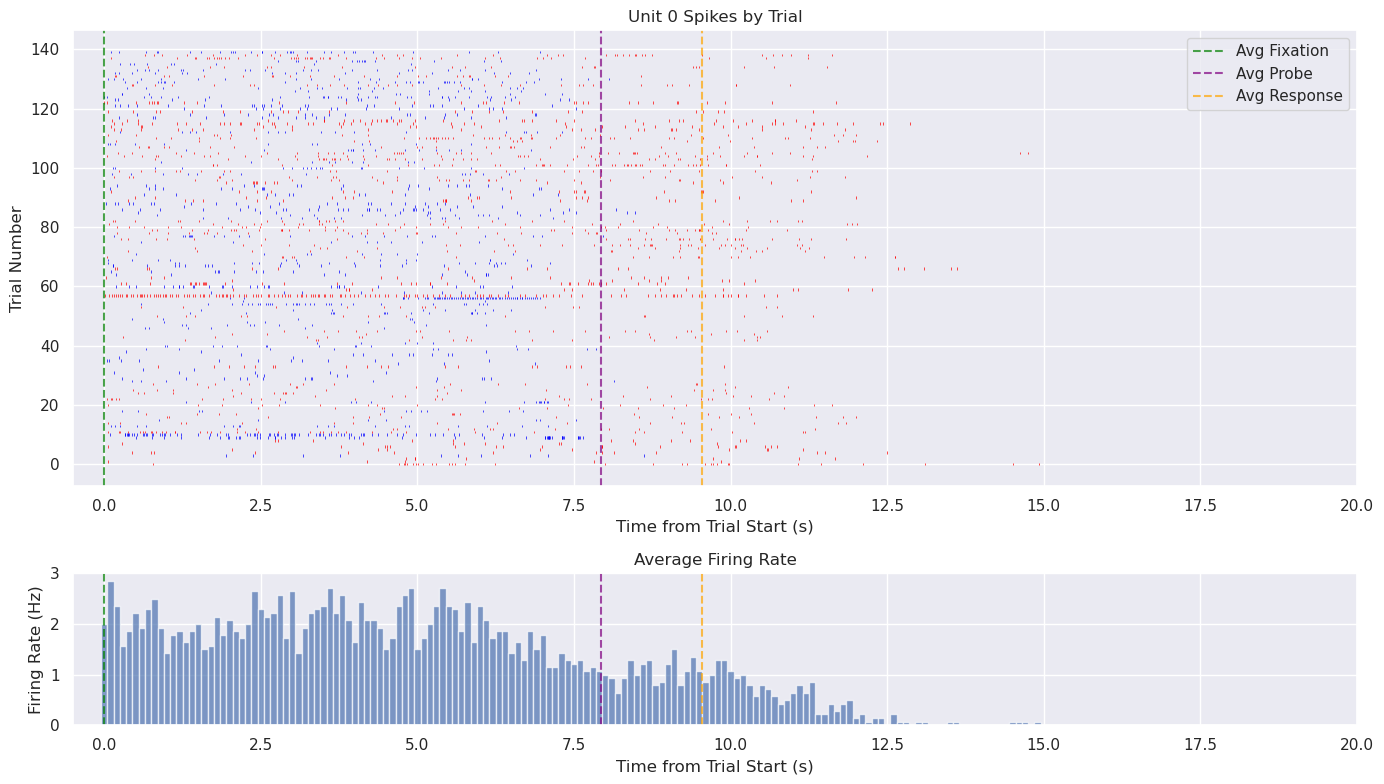

In [16]:
# Select a unit to analyze
unit_idx = 0  # Choose the first unit
unit_id = units_df.index[unit_idx]
spike_times = nwb.units['spike_times'][unit_idx]
print(f"Analyzing Unit {unit_id}")
print(f"Number of spikes: {len(spike_times)}")

# Create a raster plot for this unit
fig = plt.figure(figsize=(14, 8))
gs = plt.GridSpec(2, 1, height_ratios=[3, 1])

# Prepare trial data for plotting
trial_starts = trials_df['start_time'].values
trial_ends = trials_df['stop_time'].values
trial_loads = trials_df['loads'].values
fixation_times = trials_df['timestamps_FixationCross'].values
probe_times = trials_df['timestamps_Probe'].values
response_times = trials_df['timestamps_Response'].values

# Top plot: Spike raster aligned to trial onsets
ax1 = plt.subplot(gs[0])

# For each trial
for i in range(len(trials_df)):
    # Get the trial load (1 or 3)
    load = trial_loads[i]
    color = 'blue' if load == 1 else 'red'
    
    # Calculate the spikes relative to trial start
    trial_start = trial_starts[i]
    trial_end = trial_ends[i]
    
    # Find spikes within this trial
    trial_spikes = [t for t in spike_times if trial_start <= t <= trial_end]
    
    # Plot spikes for this trial
    if trial_spikes:
        ax1.vlines([t - trial_start for t in trial_spikes], i - 0.4, i + 0.4, 
                   color=color, linewidth=0.5)

# Add markers for different task events (using trial 0 as reference for timing)
avg_fixation_time = np.mean(fixation_times - trial_starts)
avg_probe_time = np.mean(probe_times - trial_starts)
avg_response_time = np.mean(response_times - trial_starts)

ax1.axvline(x=avg_fixation_time, color='green', linestyle='--', alpha=0.7, label='Avg Fixation')
ax1.axvline(x=avg_probe_time, color='purple', linestyle='--', alpha=0.7, label='Avg Probe')
ax1.axvline(x=avg_response_time, color='orange', linestyle='--', alpha=0.7, label='Avg Response')

ax1.set_xlim(-0.5, 20)  # Adjust as needed
ax1.set_xlabel('Time from Trial Start (s)')
ax1.set_ylabel('Trial Number')
ax1.set_title(f'Unit {unit_id} Spikes by Trial')
ax1.legend()

# Bottom plot: Average firing rate
ax2 = plt.subplot(gs[1], sharex=ax1)

# Calculate trial-averaged PSTH
bin_size = 0.1  # seconds
max_trial_duration = 20  # seconds (adjust as needed)
bins = np.arange(0, max_trial_duration + bin_size, bin_size)
psth = np.zeros(len(bins) - 1)
trial_count = 0

for i in range(len(trials_df)):
    trial_start = trial_starts[i]
    trial_end = min(trial_ends[i], trial_start + max_trial_duration)  # Cap at max duration
    
    # Find spikes within this trial
    trial_spikes = np.array([t - trial_start for t in spike_times if trial_start <= t <= trial_end])
    
    if len(trial_spikes) > 0:
        hist, _ = np.histogram(trial_spikes, bins=bins)
        psth += hist
        trial_count += 1

if trial_count > 0:
    psth = psth / (trial_count * bin_size)  # Convert to firing rate (Hz)

ax2.bar(bins[:-1], psth, width=bin_size, alpha=0.7)
ax2.set_xlabel('Time from Trial Start (s)')
ax2.set_ylabel('Firing Rate (Hz)')
ax2.set_title(f'Average Firing Rate')
ax2.axvline(x=avg_fixation_time, color='green', linestyle='--', alpha=0.7)
ax2.axvline(x=avg_probe_time, color='purple', linestyle='--', alpha=0.7)
ax2.axvline(x=avg_response_time, color='orange', linestyle='--', alpha=0.7)

plt.tight_layout()

The raster plot and peri-stimulus time histogram (PSTH) show that this neuron has distinct firing patterns related to task events:

1. Increased activity shortly after fixation when the encoding phase begins
2. Sustained firing during the maintenance period when information is held in working memory
3. Reduced activity after the probe presentation and response

This pattern is consistent with a neuron involved in working memory maintenance, showing elevated firing while information is being actively maintained.

Let's analyze the firing rates during different task phases across all units:

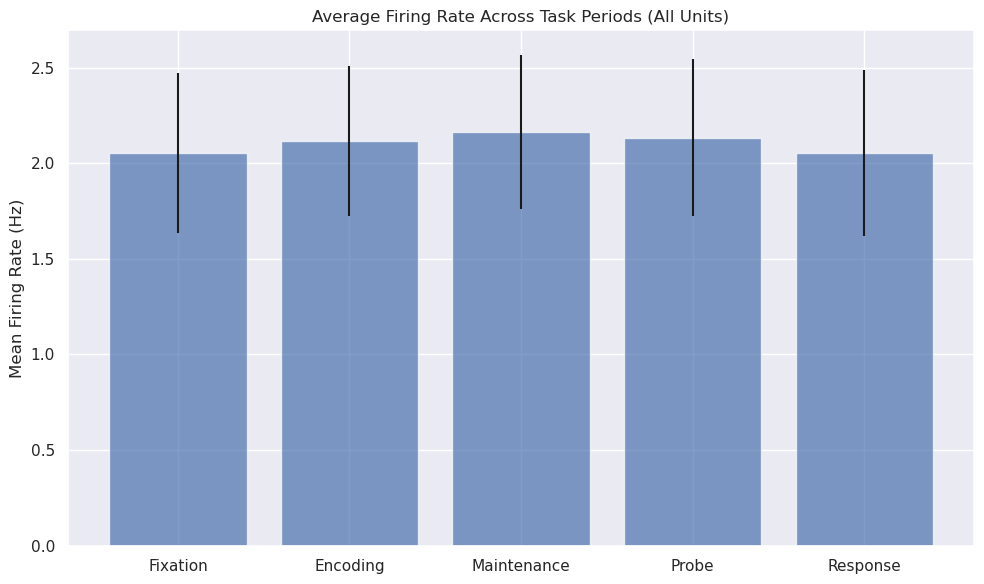

In [17]:
# Define task periods
period_names = ['Fixation', 'Encoding', 'Maintenance', 'Probe', 'Response']
period_rates = {name: [] for name in period_names}

# For all units
all_units_rates = []

for unit_idx in range(len(units_df)):
    unit_id = units_df.index[unit_idx]
    spike_times = nwb.units['spike_times'][unit_idx]
    unit_rates = []
    
    for trial_idx in range(len(trials_df)):
        # Fixation period
        start_time = fixation_times[trial_idx]
        if trial_loads[trial_idx] == 1:
            # For load 1, encoding is just Encoding1
            encoding_start = trials_df['timestamps_Encoding1'].iloc[trial_idx]
            encoding_end = trials_df['timestamps_Encoding1_end'].iloc[trial_idx]
        else:
            # For load 3, encoding spans Encoding1 to Encoding3_end
            encoding_start = trials_df['timestamps_Encoding1'].iloc[trial_idx]
            encoding_end = trials_df['timestamps_Encoding3_end'].iloc[trial_idx]
        
        maintenance_start = trials_df['timestamps_Maintenance'].iloc[trial_idx]
        probe_start = trials_df['timestamps_Probe'].iloc[trial_idx]
        response_time = trials_df['timestamps_Response'].iloc[trial_idx]
        
        # Define all periods
        periods = {
            'Fixation': (start_time, encoding_start),
            'Encoding': (encoding_start, encoding_end),
            'Maintenance': (maintenance_start, probe_start),
            'Probe': (probe_start, response_time),
            'Response': (response_time, response_time + 0.5)  # 500ms after response
        }
        
        # Calculate firing rates for each period
        for name, (period_start, period_end) in periods.items():
            # Count spikes in this period
            period_spikes = [t for t in spike_times if period_start <= t <= period_end]
            duration = period_end - period_start
            if duration > 0:
                rate = len(period_spikes) / duration  # Hz
                period_rates[name].append(rate)
    
    # Calculate average rates across all trials for this unit
    for name in period_names:
        if period_rates[name]:
            avg_rate = np.mean(period_rates[name])
            unit_rates.append(avg_rate)
        else:
            unit_rates.append(0)
    
    all_units_rates.append(unit_rates)
    
    # Reset for next unit
    period_rates = {name: [] for name in period_names}

# Convert to numpy array
all_units_rates = np.array(all_units_rates)

# Plot average firing rate for each task period across units
plt.figure(figsize=(10, 6))
means = np.mean(all_units_rates, axis=0)
std_errs = np.std(all_units_rates, axis=0) / np.sqrt(len(all_units_rates))

plt.bar(range(len(period_names)), means, yerr=std_errs, alpha=0.7)
plt.xticks(range(len(period_names)), period_names)
plt.ylabel('Mean Firing Rate (Hz)')
plt.title('Average Firing Rate Across Task Periods (All Units)')
plt.tight_layout()

This analysis shows that, on average, neurons exhibit their highest firing rates during the Maintenance period, supporting the hypothesis that these neurons are involved in working memory maintenance. The firing rates during Encoding and Probe periods are also elevated, likely reflecting information processing during stimulus presentation and retrieval.

## Summary

In this notebook, we've explored Dandiset 000673, which contains human intracranial recordings during a Sternberg working memory task. We've analyzed:

1. **Behavioral Performance**: Higher memory load (3 items) resulted in lower accuracy and longer reaction times compared to lower load (1 item), consistent with limited working memory capacity.

2. **Local Field Potentials**: The LFP signals showed strong oscillations, particularly in the delta (1-4 Hz) and theta (4-8 Hz) ranges, which are known to be involved in memory processes.

3. **Single-Unit Activity**: Neurons showed task-specific firing patterns with elevated activity during memory maintenance, suggesting direct involvement in working memory processes.

The dataset supports the hypothesis described in the Dandiset overview that theta-gamma phase-amplitude coupling in the hippocampus plays a role in working memory, particularly in integrating cognitive control and memory storage. 

## Possible Future Directions

Future analyses of this dataset could include:

1. Analyzing phase-amplitude coupling between theta and gamma oscillations during memory maintenance

2. Comparing neural activity across different brain regions (hippocampus, frontal cortex)

3. Examining correlations between neural activity and behavioral performance

4. Investigating load-dependent changes in oscillatory activity and single-unit firing patterns

5. Analyzing how neural responses differ between correctly and incorrectly remembered items

## Closing Files

Let's close the open files properly.

In [18]:
# Close the NWB file
h5_file.close()